# <h1><center>Capstone Project 1: Employee Reviews Analysis - Final Report</center></h1>

## 1. Introduction

### 1.1 The Problem

In today’s job market, job seekers like to research their potential employers before applying to open positions or accepting an employment offer. They use reviews and feedback from ex- or current employees of that organization to determine whether or not that workplace would be a good fit for them. There are several websites that offer reviews of companies based on user submitted feedback. However, it would be tedious for users to go through each and every review to make a sound judgement. Using the datasets on these websites, a model could be created to visualize the categorical and overall ratings of employers, so that it can be easily used. 

Job seekers will be able to use this report and analysis to determine which employers have gone up in their ratings and which have gone down in the last 10 years. The dataset includes ratings on various categories such as work-life balance, compensation/benefits, career opportunities, culture values, senior management as well as an overall rating. Job seekers can use this project to steer their research on potential employers, without having to browse through all feedbacks on the various company review websites.


This report can also be used by the employers featured on it to determine the categories where they have consistently received low ratings and work upon improving them.


### 1.2. The Employee Reviews dataset

The dataset used for this project was created by web scraping over 67K employee reviews for these six companies. It will be acquired as a csv file from https://www.kaggle.com/petersunga/google-amazon-facebook-employee-reviews. The dataset spans between 2008 and 2018. It contains 67529 rows and 17 columns. This is a real world dataset and likely to have a lot of null and missing values. Those will be handled by data wrangling methods.

Some of the interesting columns are:


    company                       	Name of the company
    location                      	Branch location
    dates                         	Date the review was posted
    job-title                     	Job title of the employee
    overall-ratings               	Overall rating (1-5)
    work-balance-stars            	Work life balance rating (1-5)
    culture-values-stars          	Culture and values rating (1-5)
    carrer-opportunities-stars    	Career opportunities rating (1-5)
    comp-benefit-stars            	Compensation benefits rating (1-5)
    senior-mangemnet-stars        	Senior management rating (1-5)


In [1]:
# Import packages and read the csv file into a pandas DataFrame.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
emp_df = pd.read_csv('employee_reviews.csv')

In [2]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 17 columns):
Unnamed: 0                    67529 non-null int64
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            67529 non-null object
culture-values-stars          67529 non-null object
carrer-opportunities-stars    67529 non-null object
comp-benefit-stars            67529 non-null object
senior-mangemnet-stars        67529 non-null object
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: 

The dataset consists of 67529 observations with 17 columns. The date when the review was posted and all the ratings columns were stored as object datatype in the dataset.

In [3]:
emp_df.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


### 1.3 Data Wrangling

This is a real world dataset. Upon inspection, it was found that some of the critical columns had an incorrect value of none which would neither qualify as a null value nor a numeric value. Some of the columns were poorly labelled and/or misspelled. 

The first step is to correctly label all the columns. 

In [4]:
emp_df = emp_df.rename(columns = {"job-title": "job_title", "advice-to-mgmt": "advice_to_mgmt", 
                                        "overall-ratings": "overall_ratings", "work-balance-stars": "work_balance_stars", 
                                        "culture-values-stars": "culture_values_stars", "helpful-count": "helpful_count",
                                        "carrer-opportunities-stars": "career_opportunities_stars",
                                        "comp-benefit-stars": "comp_benefit_stars", "senior-mangemnet-stars": "senior_management_stars"})

Next, we will check for null values in all columns. It would be also helpful to find the unique values in some of the columns for proper identification of nulls.

In [5]:
emp_df.isnull().sum()

Unnamed: 0                      0
company                         0
location                        0
dates                           0
job_title                       0
summary                       120
pros                            0
cons                            0
advice_to_mgmt                297
overall_ratings                 0
work_balance_stars              0
culture_values_stars            0
career_opportunities_stars      0
comp_benefit_stars              0
senior_management_stars         0
helpful_count                   0
link                            0
dtype: int64

In [6]:
emp_df['location'].unique()

array(['none', 'Mountain View, CA', 'New York, NY', ...,
       'Srinagar, Jammu and Kashmir (India)', 'Blackburn, England (UK)',
       'Pudong, Shanghai (China)'], dtype=object)

In [7]:
emp_df['culture_values_stars'].unique()

array(['5.0', '3.0', '4.0', 'none', '2.0', '1.0'], dtype=object)

In [8]:
emp_df['overall_ratings'].unique()

array([5., 4., 3., 2., 1.])

In [9]:
# Some columns have “none” as value. So they do not qualify as missing value, even though they are null. 
# By replacing all “none” values with np.NaN, they can be identified as a null value.
emp_df2 = emp_df.replace(to_replace = 'none', value = np.NaN)
emp_df2.isnull().sum()

Unnamed: 0                        0
company                           0
location                      25085
dates                             0
job_title                         0
summary                         129
pros                              0
cons                              1
advice_to_mgmt                29461
overall_ratings                   0
work_balance_stars             7160
culture_values_stars          13546
career_opportunities_stars     7108
comp_benefit_stars             7161
senior_management_stars        7775
helpful_count                     0
link                              0
dtype: int64

In [10]:
# By replacing 'none' with np.NaN, we will see that several columns have missing values.
emp_df2.dtypes

Unnamed: 0                      int64
company                        object
location                       object
dates                          object
job_title                      object
summary                        object
pros                           object
cons                           object
advice_to_mgmt                 object
overall_ratings               float64
work_balance_stars             object
culture_values_stars           object
career_opportunities_stars     object
comp_benefit_stars             object
senior_management_stars        object
helpful_count                   int64
link                           object
dtype: object

The ratings columns (overall_ratings, work_balance_stars, culture_values_stars, career_opportunities_stars, comp_benefit_stars, senior_management_stars) are the most important variables in this project. In order to plot these columns correctly, they will be converted from object datatype to float type. 

In [11]:
emp_df2['work_balance_stars'] = emp_df2['work_balance_stars'].astype(str).astype(float)
emp_df2['culture_values_stars'] = emp_df2['culture_values_stars'].astype(str).astype(float)
emp_df2['career_opportunities_stars'] = emp_df2['career_opportunities_stars'].astype(str).astype(float)
emp_df2['comp_benefit_stars'] = emp_df2['comp_benefit_stars'].astype(str).astype(float)
emp_df2['senior_management_stars'] = emp_df2['senior_management_stars'].astype(str).astype(float)

In [12]:
emp_df_sort = emp_df2.sort_values('company')
emp_df_sort.loc[emp_df_sort['dates'] == 'None']

,Unnamed: 0,company,location,dates,job_title,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,culture_values_stars,career_opportunities_stars,comp_benefit_stars,senior_management_stars,helpful_count,link
7819,7820,amazon,"Phoenix, AZ",None,Current Employee - Software Development Manager,An Amazing Place to Work,"I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ...",NaN,5.0,4.0,5.0,5.0,5.0,5.0,580,https://www.glassdoor.com/Reviews/Amazon-Revie...


In [13]:
emp_df_sort = emp_df_sort.replace(to_replace = 'None', value = np.NaN)

 We will also convert the “dates” column from object datatype to datetime format to reduce processing times.

In [14]:
# Convert the dates column from object to datetime
emp_df_sort['dates'] = pd.to_datetime(emp_df_sort['dates'], errors='coerce')
emp_df_sort.head()

,Unnamed: 0,company,location,dates,job_title,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,culture_values_stars,career_opportunities_stars,comp_benefit_stars,senior_management_stars,helpful_count,link
33764,33765,amazon,Chennai (India),2012-03-29,Former Employee - Anonymous Employee,Exp Review,great place to work for women very comfortable...,"you should be self-motivated, in order to grow...",NaN,5.0,4.5,NaN,3.5,5.0,2.5,0,https://www.glassdoor.com/Reviews/Amazon-Revie...
22841,22842,amazon,"Charleston, TN",2014-12-30,Former Employee - Warehouse,"Great job for mindless zombies, or someone in ...","pay was only about $11.00 an hour, so absolute...","Everything: long hours, horrible schedules, ve...","Be nice, floor workers are tired of your BS.",2.0,1.0,1.0,1.0,2.0,1.0,3,https://www.glassdoor.com/Reviews/Amazon-Revie...
22840,22841,amazon,"Seattle, WA",2014-12-23,Current Employee - Software Development Engineer,Good place to work right out of school,"You learn a lot in a short time period here, a...",Expectations of how much you should work seem ...,Train your dev managers better. I have yet to ...,4.0,3.0,5.0,4.0,4.0,4.0,0,https://www.glassdoor.com/Reviews/Amazon-Revie...
22839,22840,amazon,NaN,2014-12-25,Current Employee - Anonymous Employee,Good job,Good pay and friendly environment,Long hard hours and short breaks,Nothing,4.0,2.0,5.0,5.0,4.0,3.0,0,https://www.glassdoor.com/Reviews/Amazon-Revie...
22838,22839,amazon,NaN,2015-01-06,Former Employee - Anonymous Employee,Its an ok job,The work hers were good ands a lot of the ther...,The only way to get promoted or extra training...,NaN,2.0,5.0,1.0,3.0,4.0,3.0,0,https://www.glassdoor.com/Reviews/Amazon-Revie...


The ratings columns are the most important for exploration of the data so we will retain them in our dataframe and drop the columns that are not relevant for our initial analysis. Before doing that, create a copy of the cleaned dataframe for future use.

In [15]:
emp_df_sort['year'] = emp_df_sort.dates.dt.to_period('Y')

In [16]:
emp_df_sort.to_csv('employee_cleaned.csv')
emp_df = emp_df_sort.copy()

In [17]:
ind_columns = ["company", "location", "dates", "overall_ratings", "work_balance_stars", "culture_values_stars", "career_opportunities_stars",
               "comp_benefit_stars", "senior_management_stars", "year"]
#emp_df.set_index(["company", "location"], inplace=True, drop=False, verify_integrity=False)
emp_df = emp_df.reindex(columns = ind_columns)
emp_df.head()

,company,location,dates,overall_ratings,work_balance_stars,culture_values_stars,career_opportunities_stars,comp_benefit_stars,senior_management_stars,year
33764,amazon,Chennai (India),2012-03-29,5.0,4.5,NaN,3.5,5.0,2.5,2012
22841,amazon,"Charleston, TN",2014-12-30,2.0,1.0,1.0,1.0,2.0,1.0,2014
22840,amazon,"Seattle, WA",2014-12-23,4.0,3.0,5.0,4.0,4.0,4.0,2014
22839,amazon,NaN,2014-12-25,4.0,2.0,5.0,5.0,4.0,3.0,2014
22838,amazon,NaN,2015-01-06,2.0,5.0,1.0,3.0,4.0,3.0,2015


## 2. Initial data exploration
Using the nice cleaned dataset, we will begin our exploratory data analysis. The idea is to find patterns, anomalies, or relationships to inform our subsequent analysis.

In [18]:
sns.set()

### 2.1 Count of reviews by company

Let’s first review the counts by each company.

In [19]:
emp_df['company'].value_counts()

amazon       26430
microsoft    17930
apple        12950
google        7819
facebook      1590
netflix        810
Name: company, dtype: int64

Let's try to plot this count on a bar chart.

Text(0.5, 1.0, 'Count of reviews by company')

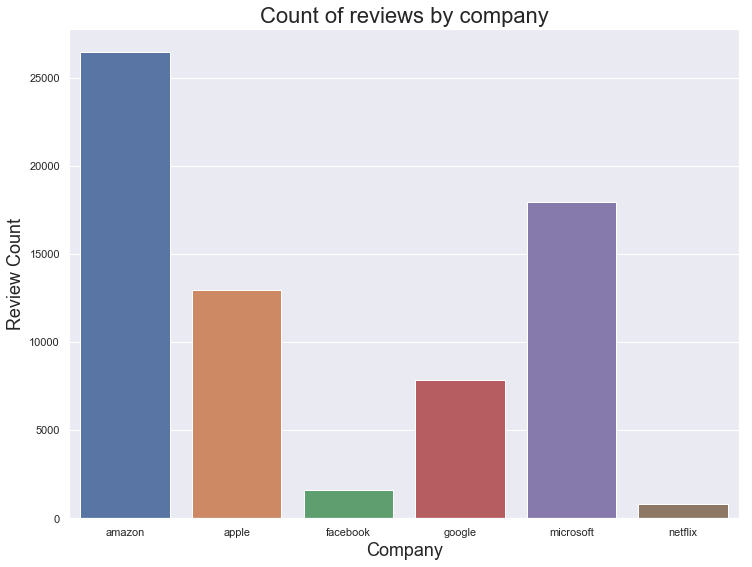

In [20]:
# GET CURRENT SIZE
fig_size = plt.rcParams['figure.figsize']
 
# SET WIDTH AND HEIGHT
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size

ax = sns.countplot(x="company", data=emp_df)
ax.set_xlabel("Company", fontsize=18)
ax.set_ylabel("Review Count", fontsize=18)
ax.set_title("Count of reviews by company", fontsize=22)

Apple and Microsoft have more than 10K reviews. Facebook and Netflix have less than 2000 reviews. Google has little less than 8K reviews. Amazon tops the charts with more than 25K reviews. The difference between number of Amazon and Netflix reviews is quite high so it is hard to determine if our analysis would be fair and accurate.

### 2.2 Counts of reviews by year

Next, let’s see the counts by year.

In [21]:
emp_df['year'].value_counts()

2017    14075
2018    13676
2016    11490
2015    10140
2014     5941
2013     3859
2012     3210
2011     1710
2008     1365
2010     1130
2009      929
Freq: A-DEC, Name: year, dtype: int64

Text(0, 0.5, 'Count')

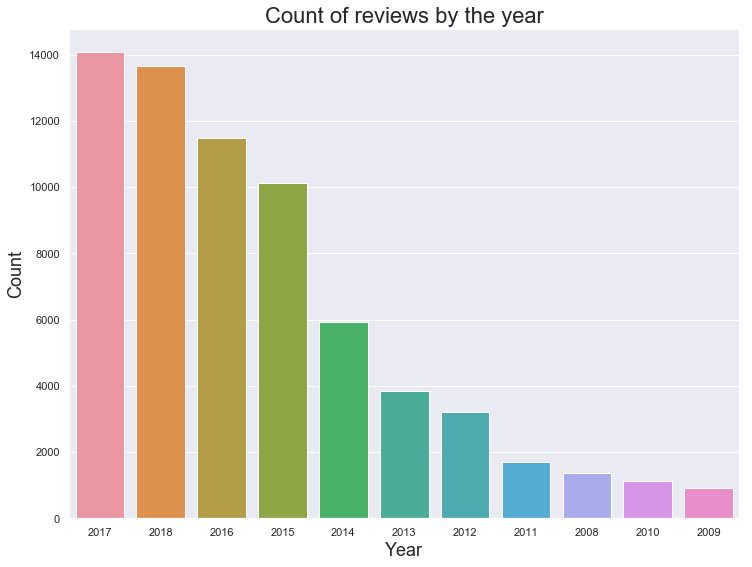

In [22]:
ax = sns.barplot(x=emp_df.year.value_counts().index, y=emp_df.year.value_counts())
ax.set_title("Count of reviews by the year", fontsize=22)
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Count", fontsize=18)

The counts are highest in recent years (2017-18) vs the earlier years (2009-10). One reason for this could be Glassdoor has become more popular over the years and considered more reliable for by employees for posting reviews. Although it must be noted that 2008 had more reviews than 2009 and 2010.

### 2.3 Distribution of overall ratings for each company

Let's try to plot the overall ratings for all companies on a boxplot and determine the distribution

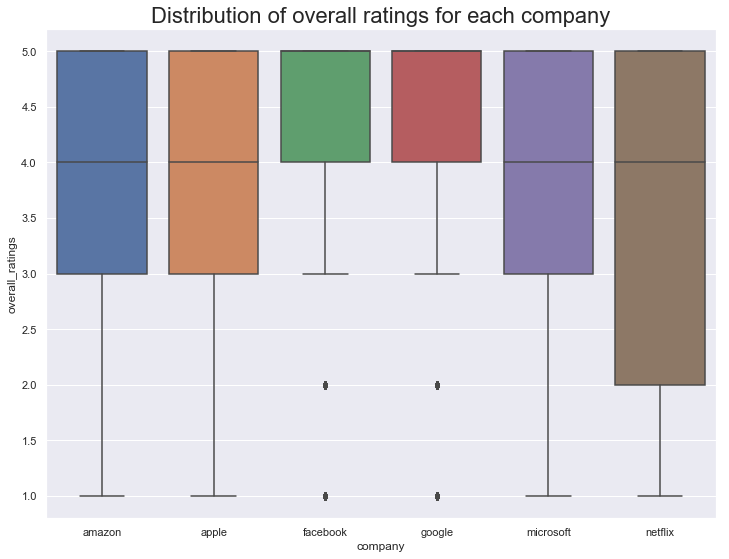

In [23]:
ax = sns.boxplot(x="company", y="overall_ratings", data=emp_df).set_title("Distribution of overall ratings for each company", fontsize=22)

The above boxplot shows the distribution of overall ratings for each company. Interestingly, the interquartile range for Facebook and Google is from 4.0 to 5.0 with some outliers. The boxplot is skewed towards the higher values for all companies except Netflix.

### 2.4 Distribution of culture values ratings for each company

Let’s look at a violin plot to find the distribution of culture and values ratings for each company. In a box plot, all the plot components correspond to actual data points whereas a violin plot features a kernel density estimation of the underlying distribution. 

C:\Users\VTripathi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of culture values ratings for each company')

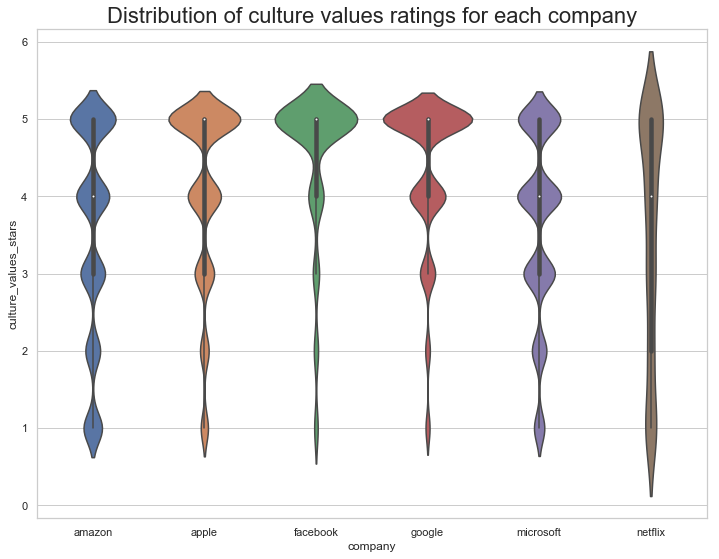

In [24]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
ax = sns.violinplot(x='company', y='culture_values_stars', data=emp_df)
ax.set_title("Distribution of culture values ratings for each company", fontsize=22)

In this violin plot, the median is 5 for Apple, Facebook and Google and close to 4 for the other three companies. The interquartile range is lowest for Netflix.

### 2.5 Mean overall ratings

Now let's try to plot a point plot that will show the mean overall ratings for each company

Text(0, 0.5, 'Mean Overall Rating')

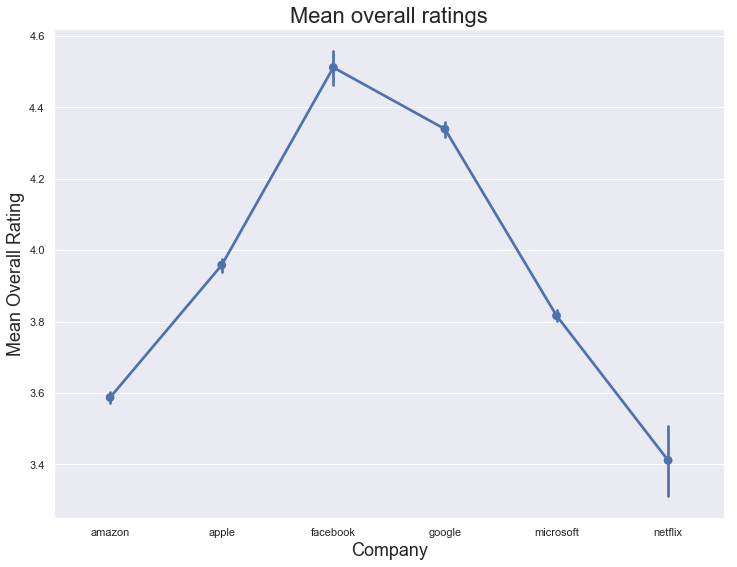

In [25]:
sns.set(style="darkgrid")
ax = sns.pointplot(x="company", y="overall_ratings", data=emp_df)
ax.set_title("Mean overall ratings", fontsize=22)
ax.set_xlabel("Company", fontsize=18)
ax.set_ylabel("Mean Overall Rating", fontsize=18)

From the above chart it is evident that Facebook received the highest average overall ratings whereas Netflix got the lowest. It will be interesting to use all the features in the dataset to determine why Facebook has the highest and Netflix has the lowest overall rating. 

### 2.6 Pairwise Relationships

Finally, we have a pairplot which will show pairwise relationships between two of our variables. A pairplot allows us to see both the distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis.

C:\Users\VTripathi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\VTripathi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


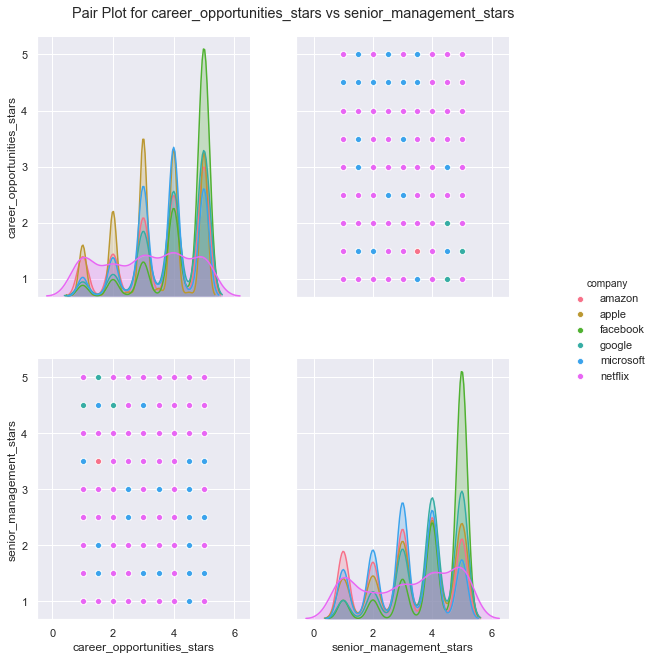

In [26]:
ax = sns.pairplot(emp_df, vars=["career_opportunities_stars", "senior_management_stars"], hue="company", palette="husl")
ax.fig.suptitle("Pair Plot for career_opportunities_stars vs senior_management_stars")
ax.fig.set_size_inches(10,10)

The histogram on the diagonal shows the distribution of a single variable. The scatter plots on the upper and lower triangles show the relationship between the 2 variables which in this case are senior management stars and career opportunities stars.

## 3. Exploratory Data Analysis
Now it's time to make some inferences from our data.

In [27]:
emp_df.head(2)

,company,location,dates,overall_ratings,work_balance_stars,culture_values_stars,career_opportunities_stars,comp_benefit_stars,senior_management_stars,year
33764,amazon,Chennai (India),2012-03-29,5.0,4.5,NaN,3.5,5.0,2.5,2012
22841,amazon,"Charleston, TN",2014-12-30,2.0,1.0,1.0,1.0,2.0,1.0,2014


### 3.1 Top 10 locations by review counts

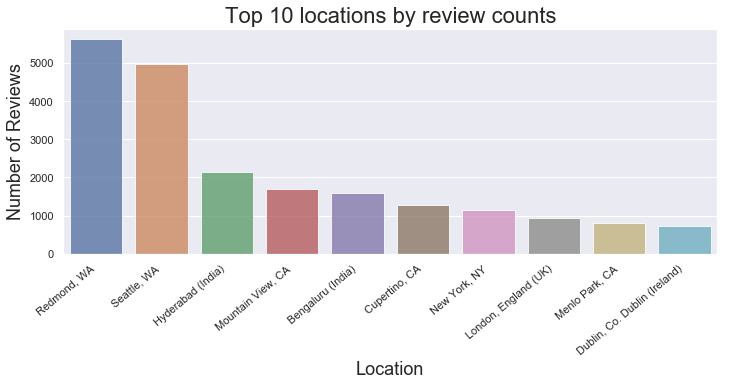

In [28]:
location_count = emp_df['location'].value_counts()
location_count = location_count[:10,]
plt.figure(figsize=(10,5))
ax = sns.barplot(location_count.index, location_count.values, alpha=0.8)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax = plt.tight_layout()
ax = plt.title('Top 10 locations by review counts', fontsize=22)
ax = plt.ylabel('Number of Reviews', fontsize=18)
ax = plt.xlabel('Location', fontsize=18)
plt.show()

By plotting the Top 10 locations by review counts, we find that most reviews came from Redmond, WA and Seattle, WA. Amazon and Apple are both headquartered in these cities and we have seen in the graph above that these 2 companies have received the most reviews from their former and current employees.

### 3.2 Missing Values

In [29]:
print('Missing location on', emp_df['location'].isnull().sum(), 'records')

Missing location on 25085 records


In [30]:
print(emp_df['culture_values_stars'].isnull().sum()/emp_df.shape[0]*100, '% missing values for culture_values_stars')

20.05952997971242 % missing values for culture_values_stars


More than 35% of the rows have missing location and about 20% have missing values in culture_values_stars. Therefore we will not be using these two columns for any of our analysis. So let's go ahead and drop the unnecessary columns from the dataframe and make a copy of it for future use.

In [31]:
emp_df_clean = emp_df.copy()
emp_df.drop(['location','culture_values_stars'], axis='columns', inplace=True)

In [32]:
emp_df.head(2)

,company,dates,overall_ratings,work_balance_stars,career_opportunities_stars,comp_benefit_stars,senior_management_stars,year
33764,amazon,2012-03-29,5.0,4.5,3.5,5.0,2.5,2012
22841,amazon,2014-12-30,2.0,1.0,1.0,2.0,1.0,2014


The other ratings columns have less than 10% rows with missing values, which will be filled with either the mean or the median of those columns.

In [33]:
print(emp_df.work_balance_stars.mean(), emp_df.work_balance_stars.median())
print(emp_df.career_opportunities_stars.mean(), emp_df.career_opportunities_stars.median())
print(emp_df.comp_benefit_stars.mean(), emp_df.comp_benefit_stars.median())
print(emp_df.senior_management_stars.mean(), emp_df.senior_management_stars.median())

3.373254484917756 3.5
3.6340345244203176 4.0
3.942502650410814 4.0
3.3225223416005623 3.0


The mean and median for these 4 predictor variables are close so we will fill the missing values with the mean.

In [34]:
wbs_mean = emp_df['work_balance_stars'].mean()
emp_df['work_balance_stars'] = emp_df['work_balance_stars'].fillna(value=wbs_mean)

cos_mean = emp_df['career_opportunities_stars'].mean()
emp_df['career_opportunities_stars'] = emp_df['career_opportunities_stars'].fillna(value=cos_mean)

cbs_mean = emp_df['comp_benefit_stars'].mean()
emp_df['comp_benefit_stars'] = emp_df['comp_benefit_stars'].fillna(value=cbs_mean)

sms_mean = emp_df['senior_management_stars'].mean()
emp_df['senior_management_stars'] = emp_df['senior_management_stars'].fillna(value=sms_mean)

emp_df['senior_management_stars'].unique()

array([2.5       , 1.        , 4.        , 3.        , 2.        ,
       3.32252234, 5.        , 4.5       , 1.5       , 3.5       ])

### 3.3 Identifying Outliers

In [35]:
emp_df.describe()

,overall_ratings,work_balance_stars,career_opportunities_stars,comp_benefit_stars,senior_management_stars
count,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000
mean,3.826075,3.373254,3.634035,3.942503,3.322522
std,1.154989,1.229057,1.159480,0.981985,1.234583
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.373254,4.000000,4.000000,3.322522
75%,5.000000,4.000000,5.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


None of the numerical columns seem to have any outliers as such so we can continue with the in-depth analysis.

The dataset is rich and interesting and can be used to answer a lot of other questions such as:
1.	Do current employees give more reviews than the ex-employees?
2.	Is there a trend between the number of reviews and dates?
3.	Were there a high number of reviews on a particular day?
4.	What is the average overall rating? Which companies have consistently continued to stay above this average?
5.  Which variables are the biggest predictor for the target variable (overall_ratings)?

## 4. In-depth Analysis

### 4.1 What is the main question for this project?

I would say the most important question is: What are the various factors that influence the overall_ratings review an employee gives to their ex- or current employer?

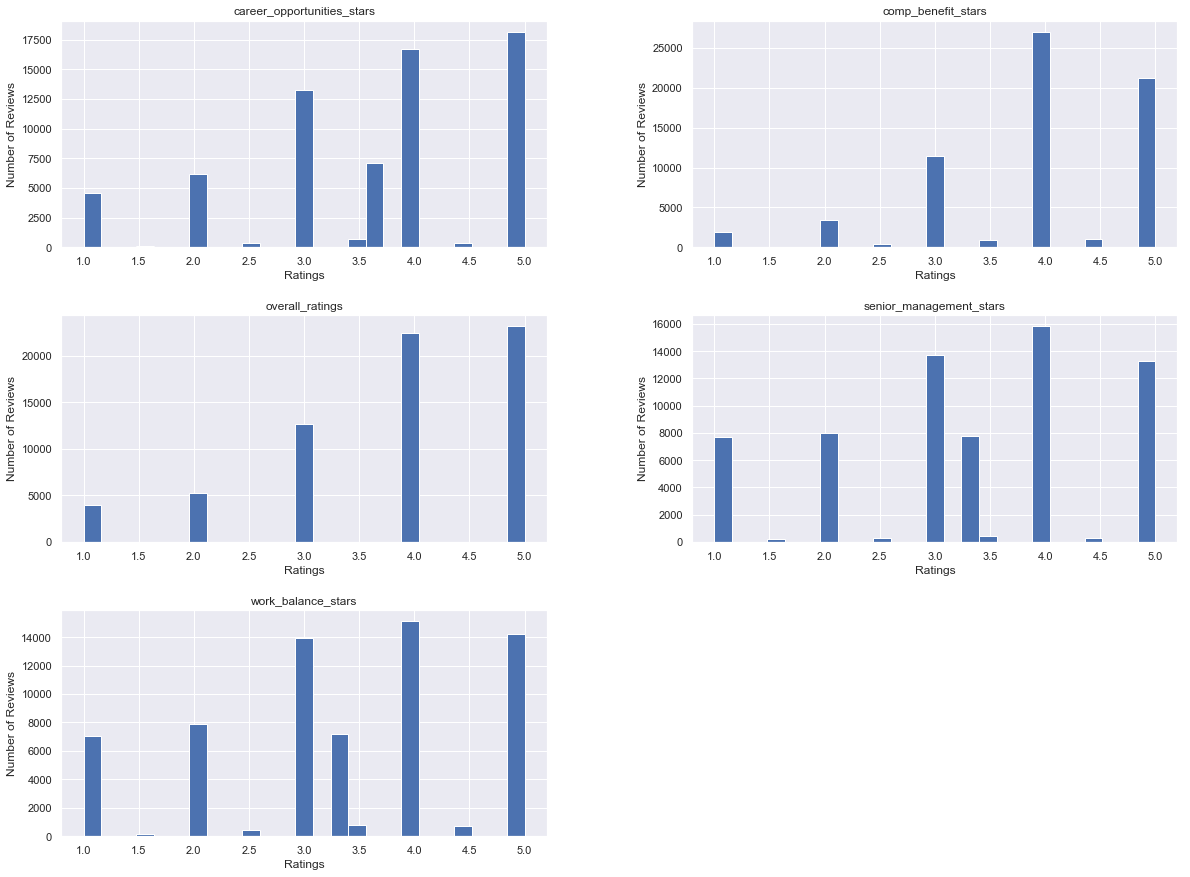

In [36]:
# Create histograms for all numerical columns, set number of bins and size
axarr = emp_df.hist(bins=25, figsize=(20,15))

for ax in axarr.flatten():
   ax.set_xlabel('Ratings')
   ax.set_ylabel('Number of Reviews')

# Show plot
plt.show()

### 4.2 Are there variables that are particularly significant in terms of explaining the answer to your project question?

In the dataset, we have many variables that could be significant in how an employee rates his employer. Right now, we will just focus on the variables that have a numerical value for the rating. These variables are: work_balance_stars, career_opportunities_stars, comp_benefit_stars and senior_management_stars. All the other features have been removed from the dataframe.

### 4.3 Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

We ran a correlation matrix between the target variable (overall_ratings) and the four numerical ratings columns. The variables work_balance_stars and comp_benefit_stars both have a moderate positive relation with overall_ratings. 
On the other hand, career_opportunities_stars and senior_management_stars both have a strong positive relation with overall_ratings. 

In [37]:
corr_matrix = emp_df.corr()
corr_matrix['overall_ratings'].sort_values(ascending=False)

overall_ratings               1.000000
senior_management_stars       0.688452
career_opportunities_stars    0.659956
work_balance_stars            0.580291
comp_benefit_stars            0.512315
Name: overall_ratings, dtype: float64

In [38]:
print('Correlation between work_balance_stars and overall_ratings: ', emp_df['work_balance_stars'].corr(emp_df['overall_ratings']))
print('Correlation between comp_benefit_stars and overall_ratings: ', emp_df['comp_benefit_stars'].corr(emp_df['overall_ratings']))
print('Correlation between career_opportunities_stars and overall_ratings: ', emp_df['career_opportunities_stars'].corr(emp_df['overall_ratings']))
print('Correlation between senior_management_stars and overall_ratings: ', emp_df['senior_management_stars'].corr(emp_df['overall_ratings']))

Correlation between work_balance_stars and overall_ratings:  0.5802912944411607
Correlation between comp_benefit_stars and overall_ratings:  0.5123151647565627
Correlation between career_opportunities_stars and overall_ratings:  0.6599561796214779
Correlation between senior_management_stars and overall_ratings:  0.6884520727835641


Typically employees are most happy when they receive good career growth opportunities within their organization. And such opportunities are usually provided by the senior management. So let's check the correlation between career_opportunities_stars and senior_management_stars and see if we can prove our theory.

In [39]:
print('Correlation between career_opportunities_stars and senior_management_stars: ', emp_df['career_opportunities_stars'].corr(emp_df['senior_management_stars']))
print('Correlation between work_balance_stars and comp_benefit_stars: ', emp_df['work_balance_stars'].corr(emp_df['comp_benefit_stars']))

Correlation between career_opportunities_stars and senior_management_stars:  0.6247170550232829
Correlation between work_balance_stars and comp_benefit_stars:  0.41462863313167897


So we see here that the correlation between career_opportunities_stars and senior_management_stars is strong.
The correlation between work_balance_stars and comp_benefit_stars is moderate. 

Let's plot a heatmap to check for the correlation between the features.

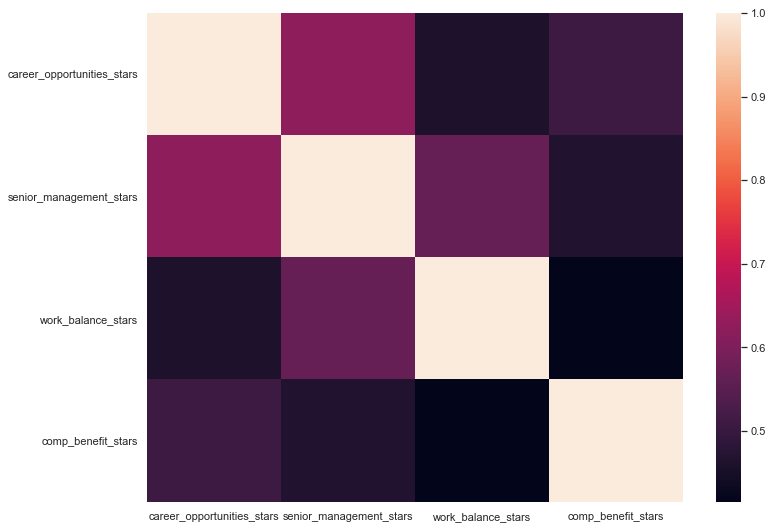

In [40]:
corr = emp_df[['career_opportunities_stars', 'senior_management_stars', 'work_balance_stars', 'comp_benefit_stars']].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

### 4.4 What are the most appropriate tests to use to analyse these relationships?

The Pearson correlation test assumes that the variables are normally distributed whereas the Spearman Correlation does not assume that the datasets are normally distributed. Let's run both tests on our variables.

In [41]:
print('Pearson Correlation: ', stats.pearsonr(emp_df.career_opportunities_stars, emp_df.senior_management_stars))
print(stats.spearmanr(emp_df.career_opportunities_stars, emp_df.senior_management_stars))

Pearson Correlation:  (0.6247170550232822, 0.0)
SpearmanrResult(correlation=0.6005304026661672, pvalue=0.0)


In [42]:
print('Pearson Correlation: ', stats.pearsonr(emp_df.work_balance_stars, emp_df.comp_benefit_stars))
print(stats.spearmanr(emp_df.work_balance_stars, emp_df.comp_benefit_stars))

Pearson Correlation:  (0.41462863313167836, 0.0)
SpearmanrResult(correlation=0.3865441526194612, pvalue=0.0)


In [43]:
# Pick columns to check
x = emp_df['overall_ratings']
y1 = emp_df['senior_management_stars']
y2 = emp_df['career_opportunities_stars']
y3 = emp_df['work_balance_stars']
y4 = emp_df['comp_benefit_stars']

# Scipy's Paerson function returns the correlation and the p-value
print(stats.pearsonr(x, y1))
print(stats.pearsonr(x, y2))
print(stats.pearsonr(x, y3))
print(stats.pearsonr(x, y4))

(0.688452072783564, 0.0)
(0.6599561796214771, 0.0)
(0.5802912944411611, 0.0)
(0.5123151647565624, 0.0)


Our null hypotheses is the variables are independent and alternative hypotheses is they are not independent but correlated.
The Pearson correlation between overall_ratings and the predictor variables reports a p-value of 0.0 which indicates that we can reject the null hypotheses and accept the alternative hypotheses that there is a correlation.

Another test that can tried is the chi-square test.

In [44]:
# Tabulate work_balance_stars and overall_ratings
wbs_overall = pd.crosstab(index=emp_df['work_balance_stars'],columns=emp_df['overall_ratings'])
wbs_overall.head()

overall_ratings,1.0,2.0,3.0,4.0,5.0
work_balance_stars,,,,,
1.0,2431,1800,1779,781,266
1.5,30,78,47,18,2
2.0,476,1290,2785,2526,821
2.5,34,137,176,97,13
3.0,388,870,3565,5787,3304


In [45]:
# Test relationship between work_balance_stars and overall_ratings
wbs_overall_chisq = stats.chi2_contingency(wbs_overall)

# Output: (chi square test statistic, p, degrees of freedom)
wbs_overall_chisq[:3]

(32671.080790591095, 0.0, 36)

In [46]:
# Tabulate senior_management_stars and overall_ratings
sms_overall = pd.crosstab(index=emp_df['senior_management_stars'],columns=emp_df['overall_ratings'])

# Test relationship between senior_management_stars and overall_ratings
sms_overall_chisq = stats.chi2_contingency(sms_overall)

# Output: (chi square test statistic, p, degrees of freedom)
sms_overall_chisq[:3]

(49902.95075246505, 0.0, 36)

This test also gives us a p-value of 0.0 which is less than 0.05. Hence we reject the null hypotheses and deduce that the variables are correlated.

In [47]:
apple_df = emp_df[emp_df.company == 'apple']
amazon_df = emp_df[emp_df.company == 'amazon']
facebook_df = emp_df[emp_df.company == 'facebook']
google_df = emp_df[emp_df.company == 'google']
microsoft_ds = emp_df[emp_df.company == 'microsoft']
netflix_df = emp_df[emp_df.company == 'netflix']

In [48]:
emp_df.groupby('company')['overall_ratings'].describe()

,count,mean,std,min,25%,50%,75%,max
company,,,,,,,,
amazon,26430.0,3.587363,1.257311,1.0,3.0,4.0,5.0,5.0
apple,12950.0,3.958224,1.064032,1.0,3.0,4.0,5.0,5.0
facebook,1590.0,4.511950,0.955680,1.0,4.0,5.0,5.0,5.0
google,7819.0,4.339430,0.920695,1.0,4.0,5.0,5.0,5.0
microsoft,17930.0,3.816564,1.036499,1.0,3.0,4.0,5.0,5.0
netflix,810.0,3.411111,1.415131,1.0,2.0,4.0,5.0,5.0


In [49]:
emp_df.groupby('company')['year'].describe()

,count,unique,top,freq
company,,,,
amazon,26428,11,2018,8054
apple,12949,11,2016,2562
facebook,1590,11,2017,324
google,7819,11,2017,1490
microsoft,17930,11,2015,3011
netflix,809,11,2015,104


In [50]:
# function to get the Margin of Error of the mean
def get_mem(sample, alpha=0.95, dof=1):
    """ This function takes a series as input.
    It also optionally takes a significance level
    and degrees of freedom as input.
    This function returns the margin of error
    for the mean of the input series."""
    
    # find the number of non-null values
    sample_count = np.count_nonzero(~np.isnan(sample))
    
    # find the mean and standard error of the mean
    mean = np.nanmean(sample)
    sem = np.nanstd(sample, ddof=dof) / np.sqrt(sample_count)
    
    # get the confidence interval
    cim = stats.norm.interval(alpha, loc=mean, scale=sem)
    
    # calculate and return the margin of error
    mem = (cim[1] - cim[0]) / 2
    return mem

In [51]:
# get mean and SE of the mean for each station
df_mem = emp_df[['career_opportunities_stars', 'senior_management_stars', 'work_balance_stars', 'comp_benefit_stars']].groupby(emp_df.company).agg([np.nanmean, get_mem])
df_mem

career_opportunities_stars           senior_management_stars  \
                             nanmean   get_mem                 nanmean   
company                                                                  
amazon                      3.607071  0.014944                3.191030   
apple                       3.438122  0.020292                3.448864   
facebook                    4.338216  0.048876                4.239023   
google                      3.907707  0.022553                3.755193   
microsoft                   3.657593  0.015026                3.160415   
netflix                     3.100459  0.094168                3.205850   

                    work_balance_stars           comp_benefit_stars            
            get_mem            nanmean   get_mem            nanmean   get_mem  
company                                                                        
amazon     0.015420           3.052557  0.015336           3.721170  0.012985  
apple      0.021292           3.367992  0.021082           4.014815  0.016489  
facebook   0.053474           3.914501  0.056195           4.544816  0.036556  
google     0.023120           3.893909  0.022847           4.305022  0.017918  
microsoft  0.016896           3.579517  0.016197           3.997241  0.012359  
netflix    0.099237           3.267485  0.091479           4.114969  0.067402

In [52]:
df_cos = df_mem['career_opportunities_stars']
df_cos.columns = ['sample_mean','mem']
df_cos = df_cos.sort_values('sample_mean').reset_index()

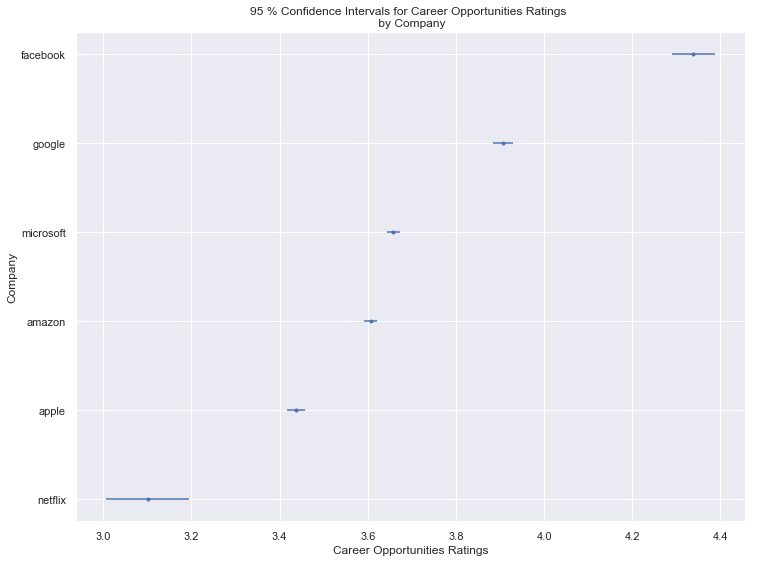

In [53]:
# plot the CI for career opportunities stars
plt.errorbar(x=df_cos.sample_mean, y=df_cos.index, xerr=df_cos.mem, marker='.', linestyle='none')
plt.yticks(df_cos.index, df_cos.company)
plt.xlabel('Career Opportunities Ratings')
plt.ylabel('Company')
plt.title('95 % Confidence Intervals for Career Opportunities Ratings \n by Company')
plt.show()

### 4.5 Conclusion from Statistical Inference
All the ratings variables are correlated and show as pattern. Further analysis should be done using regression models and F-tests. I think it will be interesting to also analyze the summary, pros, cons and advice_to_mgmt columns. They contain textual data and I would like to use NLP techniques to conduct text processing and sentiment analysis on them.

## 5. Machine Learning

We will first apply the Linear Regression model on our dataset. "Linear" means that the relationship between the dependent variable and independent variable(s) is linear in the parameters. Linear Regression aka least square regression estimates the coefficients of the linear equation, involving one or more independent variables, that best predict the value of the dependent variable.

### 5.1 Linear Regression

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [55]:
# Get all the columns from the dataframe.
columns = emp_df.columns.tolist()
# Keep only the independent variables that will be used for predicting
columns = [c for c in columns if c not in ["dates", "overall_ratings", "year", "company", "overall_score"]]
# overall_ratings will be our target variable
target = "overall_ratings"

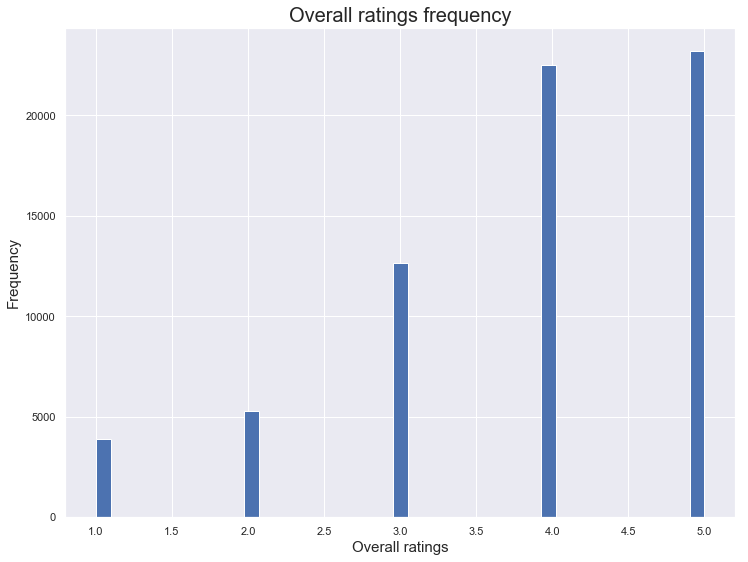

In [56]:
# Define features and labels
X = emp_df[columns] 
y = emp_df[target] 
_ = plt.hist(y, bins='auto')
_ = plt.xlabel('Overall ratings', fontsize=15)
_ = plt.ylabel('Frequency', fontsize=15)
_ = plt.title('Overall ratings frequency', fontsize=20)

In [57]:
index = ['LinearRegression', 'Lasso','Ridge','RandomForestRegressor', 'GradientBoostingRegressor']
score_table = pd.DataFrame(index = index, columns= ['r2_train','r2_test','mse_train','mse_test'])

In [58]:
def compute_score_table(algo, pred_train, pred_test):
    # compute the performance
    r2_train = r2_score(y_train, pred_train)
    r2_test = r2_score(y_test, pred_test)
    mse_train = mean_squared_error(y_train, pred_train)
    mse_test = mean_squared_error(y_test, pred_test)
    
    # log the performance
    score_table.loc[algo,:] = r2_train, r2_test, mse_train, mse_test

In [59]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#Printing the shapes of both sets.
print("Training FeaturesSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeaturesSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeaturesSet: (54023, 4)
Training Labels: (54023,)
Testing FeaturesSet: (13506, 4)
Testing Labels: (13506,)


In [60]:
linreg = Pipeline([('scaler', StandardScaler()),('linreg',LinearRegression())])
linreg.fit(X_train, y_train)
pred_train = linreg.predict(X_train)
pred_test = linreg.predict(X_test)
# print feature importance
feature_rank = pd.DataFrame({'feature':X_train.columns, 'coefficient':linreg.named_steps.linreg.coef_})
print(feature_rank.sort_values('coefficient',ascending=False))
compute_score_table('LinearRegression', pred_train, pred_test)


                      feature  coefficient
3     senior_management_stars     0.380492
1  career_opportunities_stars     0.344480
0          work_balance_stars     0.241190
2          comp_benefit_stars     0.137887


The coefficient of determination is similar for the training and test data so we should use Cross Validation for further analysis.

### 5.2 Cross Validation

Let's evaluate the score by cross validation. It helps in estimating the error over test set and in deciding which parameters work best for the model.

In [61]:
cv_results = cross_val_score(linreg, X, y, cv=3)
print(cv_results)

[0.60404872 0.5692544  0.57190054]


Linear Regression minimizes a loss function. It chooses a coefficient for each feature variable. Large coefficients can lead to overfitting. That is when, regularization comes into picture. This technique regularizes the coefficient estimates towards 0. There are two types of Regularization procedures: Ridge Regression and Lasso Regression.

### 5.3 Ridge Regression and Lasso Regression

We will first apply the Ridge Regression to our dataset.

In [62]:
ridge = Pipeline([('scaler', StandardScaler()),('ridge',Ridge())])
parameters = {'ridge__alpha': np.arange(7000, 9000, 100)}
ridge_cv = GridSearchCV(ridge, parameters, scoring='r2',cv=3)
ridge_cv.fit(X_train, y_train)
print('Best parameters:', ridge_cv.best_params_)
print('Corresponding R2 score:', ridge_cv.best_score_)
ridge = Pipeline([('scaler', StandardScaler()),('ridge',Ridge(alpha=8200))])
ridge.fit(X_train, y_train)
pred_train = ridge.predict(X_train)
pred_test = ridge.predict(X_test)

# print feature ranking
feature_rank = pd.DataFrame({'feature':X_train.columns, 'coefficient':ridge.named_steps.ridge.coef_})
print(feature_rank.sort_values('coefficient',ascending=False))

compute_score_table('Ridge', pred_train, pred_test)

Best parameters: {'ridge__alpha': 7000}
Corresponding R2 score: 0.6024458178342619
                      feature  coefficient
3     senior_management_stars     0.344322
1  career_opportunities_stars     0.316392
0          work_balance_stars     0.234467
2          comp_benefit_stars     0.149191


In [63]:
# LASSO model

# initialize a Lasso model with default parameters
lasso= Pipeline([('scaler', StandardScaler()),('lasso',Lasso())])

# grid search of parameter alpha to improve lasso model
parameters = {'lasso__alpha': np.arange(0.05, 1, 0.05)}
lasso_cv = GridSearchCV(lasso, parameters, scoring='r2',cv=3)
lasso_cv.fit(X_train, y_train)
print('Best parameters:', lasso_cv.best_params_)
print('Corresponding R2 score:', lasso_cv.best_score_)

# update model with the best parameters
lasso = Pipeline([('scaler', StandardScaler()),('lasso', Lasso(alpha=0.65))])
lasso.fit(X_train, y_train)
pred_train = lasso.predict(X_train)
pred_test = lasso.predict(X_test)

# print feature ranking
feature_rank = pd.DataFrame({'feature':X_train.columns, 'coefficient':lasso.named_steps.lasso.coef_})
print(feature_rank.sort_values('coefficient',ascending=False))

compute_score_table('Lasso', pred_train, pred_test)

Best parameters: {'lasso__alpha': 0.05}
Corresponding R2 score: 0.6032010787816741
                      feature  coefficient
3     senior_management_stars     0.125088
1  career_opportunities_stars     0.035441
0          work_balance_stars     0.000000
2          comp_benefit_stars     0.000000


### 5.4 Random Forest

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. It involves training each decision tree on a different data sample where sampling is done with replacement.

In [64]:
RF = RandomForestRegressor(verbose=True, n_estimators=100)
RF.fit(X, y)
rfr = Pipeline([('scaler', StandardScaler()),('rfr',RandomForestRegressor())])

# grid search of parameters n_estimators and max_features to improve RandomForestRegressor model
parameters = {'rfr__n_estimators': np.arange(100,160,10), 'rfr__max_features':['auto','sqrt','log2']}
rfr_cv = GridSearchCV(rfr, parameters, scoring='r2',cv=3)
rfr_cv.fit(X_train, y_train)
print('Best parameters:', rfr_cv.best_params_)
print('Corresponding R2 score:', rfr_cv.best_score_)

# update model with best parameters
rfr = Pipeline([('scaler', StandardScaler()),('rfr', RandomForestRegressor(n_estimators=150, max_features='log2', n_jobs=2))])
rfr.fit(X_train, y_train)
pred_train = rfr.predict(X_train)
pred_test = rfr.predict(X_test)

# print feature importance
feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': rfr.named_steps.rfr.feature_importances_})
print(feature_rank.sort_values(by='importance',ascending=False))

compute_score_table("RandomForestRegressor", pred_train, pred_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.4s finished


Best parameters: {'rfr__max_features': 'sqrt', 'rfr__n_estimators': 140}
Corresponding R2 score: 0.6116304138766356
                      feature  importance
3     senior_management_stars    0.455594
1  career_opportunities_stars    0.313812
0          work_balance_stars    0.178159
2          comp_benefit_stars    0.052434


### 5.5 Gradient Boosting

In [70]:
gbr = Pipeline([('scaler', StandardScaler()),('gbr',GradientBoostingRegressor())])

# grid search of parameter n_estimators, max_features, max_depth, learning_rate to improve GradientBoostingRegressor model
parameters = {'gbr__n_estimators': np.arange(50,300,50), 'gbr__learning_rate': [0.01, 0.05, 0.1, 0.15],'gbr__max_features':['auto','sqrt','log2'],'gbr__max_depth': np.arange(4,9,2)}
gbr_cv = GridSearchCV(gbr, parameters, scoring='r2',cv=3)
gbr_cv.fit(X_train, y_train)
print('Best parameters:', gbr_cv.best_params_)
print('Corresponding R2 score:', gbr_cv.best_score_)

gbr = Pipeline([('scaler', StandardScaler()),
                  ('gbr', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_features='log2', max_depth=8))])
gbr.fit(X_train, y_train)
pred_train = gbr.predict(X_train)
pred_test = gbr.predict(X_test)

# print feature importance
feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': gbr.named_steps.gbr.feature_importances_})
print(feature_rank.sort_values(by='importance',ascending=False))

compute_score_table("GradientBoostingRegressor", pred_train, pred_test)

Best parameters: {'gbr__learning_rate': 0.05, 'gbr__max_depth': 4, 'gbr__max_features': 'log2', 'gbr__n_estimators': 200}
Corresponding R2 score: 0.5040332275795294
                      feature  importance
3     senior_management_stars    0.376478
1  career_opportunities_stars    0.334708
0          work_balance_stars    0.231104
2          comp_benefit_stars    0.057710


In [71]:
print(score_table)

                           r2_train   r2_test mse_train  mse_test
LinearRegression           0.606214  0.599102  0.526459  0.530069
Lasso                       0.17288  0.172968   1.10579   1.09351
Ridge                      0.603804  0.597716  0.529681  0.531902
RandomForestRegressor       0.64646  0.605783  0.472653  0.521236
GradientBoostingRegressor  0.532394  0.493543  0.102255  0.110997


All of the above models show that senior_management_stars is the most important feature for predicting the overall_ratings. The feature comp_benefit_stars seems to be the least important of the four.

### 5.6 Classification Problem
Next let's try to solve a classification problem on our dataset. We will create a new column called overall_score which will take values of 0 and 1, depending on whether the overall_ratings is below or above the mean overall_ratings.

In [66]:
emp_df['overall_score'] = np.where((emp_df['overall_ratings'] > emp_df['overall_ratings'].mean()), 1, 0)

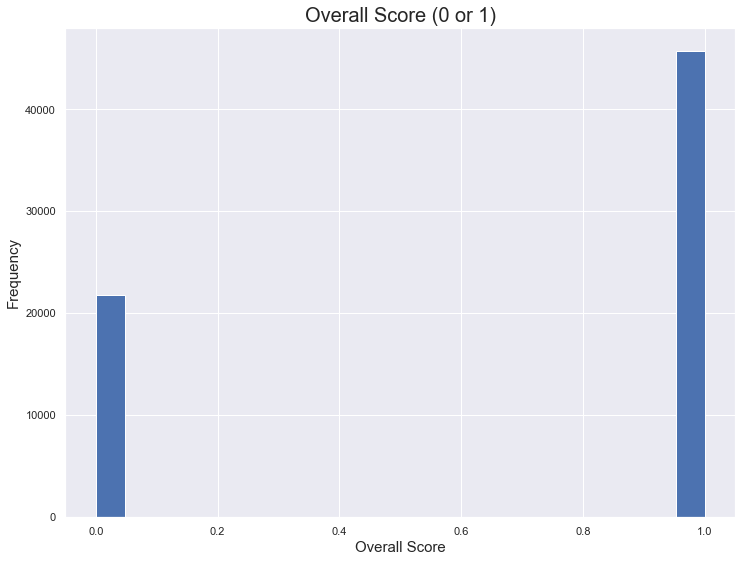

In [67]:
target = "overall_score"

y = emp_df[target]
_ = plt.hist(y, bins='auto')
_ = plt.xlabel('Overall Score', fontsize=15)
_ = plt.ylabel('Frequency', fontsize=15)
_ = plt.title('Overall Score (0 or 1)', fontsize=20)

In [68]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [69]:
# Apply the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print("SVM Accuracy = ", accuracy_score(y_test, predictions))
print("Mean Absoulte Error = ", mean_absolute_error(predictions, y_test))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

SVM Accuracy =  0.8474751962090923
Mean Absoulte Error =  0.15252480379090774
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75      6572
           1       0.87      0.92      0.89     13687

   micro avg       0.85      0.85      0.85     20259
   macro avg       0.83      0.81      0.82     20259
weighted avg       0.84      0.85      0.84     20259

Confusion Matrix:
 [[ 4639  1933]
 [ 1157 12530]]


## Future work

For this project, we used only the numerical features (ratings) in the dataset. It will be interesting to analyze the other columns as well. Summary, pros, cons and advice_to_mgmt contain textual data and I would like to use NLP techniques to conduct text processing and sentiment analysis on them. Ratings by location and ratings by ex-employees vs current employees will be another good data point to analyze.

## Conclusion

Of the four independent numerical variables that we worked with, we noticed that overall ratings of a company are most affected by senior management ratings and least affected by the compensation and benefits ratings. The quality of senior leadership is most important for employee satisfaction followed by career growth opportunities. Work-life balance and compensation/benefits matter the least for workplace happiness.